# Loan Prediction 

### About Data.
<p>Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan</p>
<p>The Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

It’s a classification problem , given information about the application we have to predict whether they’ll be to pay the loan or not.</p>

### Importing Modules

In [7]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

### Loading the data

In [8]:
# Let's Load the Dataset
df = pd.read_csv('./data/loan_data.csv')
print('Shape Of Dataset: ', df.shape)
print('Samples : {}'.format(df.shape[0]))
print('Feature Columns : {}'.format(df.shape[1]))
print('Columns Names : ', list(df.columns))
df.head(3)

Shape Of Dataset:  (614, 13)
Samples : 614
Feature Columns : 13
Columns Names :  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


### Dropping Null Values

In [9]:
# Step 1: Cleaning Null Values
print(df.isnull().sum())

# We can fill null values with mean, mode but for now let's just drop them completely
df = df.dropna()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


### Plotting Categorical and Numerical Data

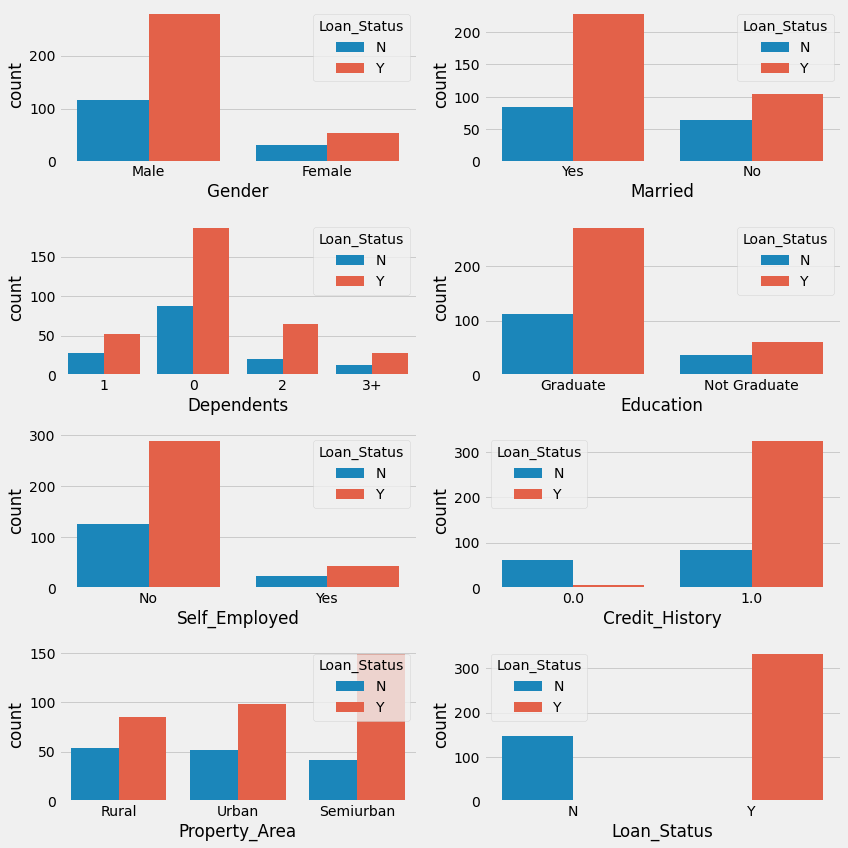

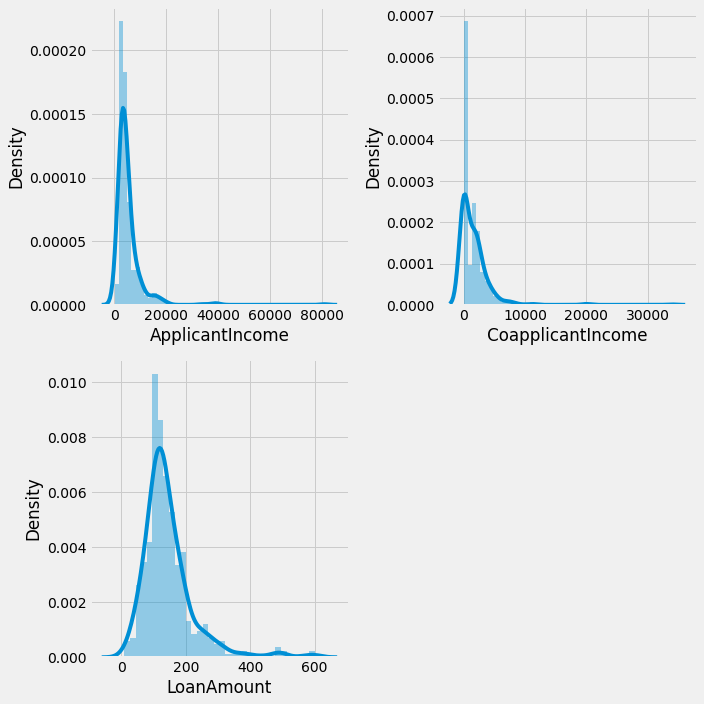

In [10]:
# Plotting Categorical Subplots
# Column names to plot
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History','Property_Area', 'Loan_Status']

numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Bar Plot for Categorical Columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
axes = axes.ravel()

for col, ax in zip(categorical_cols, axes): 
  sns.countplot(df[col], ax=ax, hue='Loan_Status', data=df)

fig.tight_layout()
plt.show()

# Distplot for Numerical columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.ravel()

for col, ax in zip(numerical_cols, axes): 
  sns.distplot(df[col], ax=ax)

fig.delaxes(axes[3])
fig.tight_layout()
plt.show()

## Insights

### 1. Most of our customers include Males.
### 2. Majority are Married and are Graduates.
### 3. All income density graph are right skewed so we might want to transform data...using log transformation or exponential to make it centered

#### Centering Numerical Data Using Log Transformation

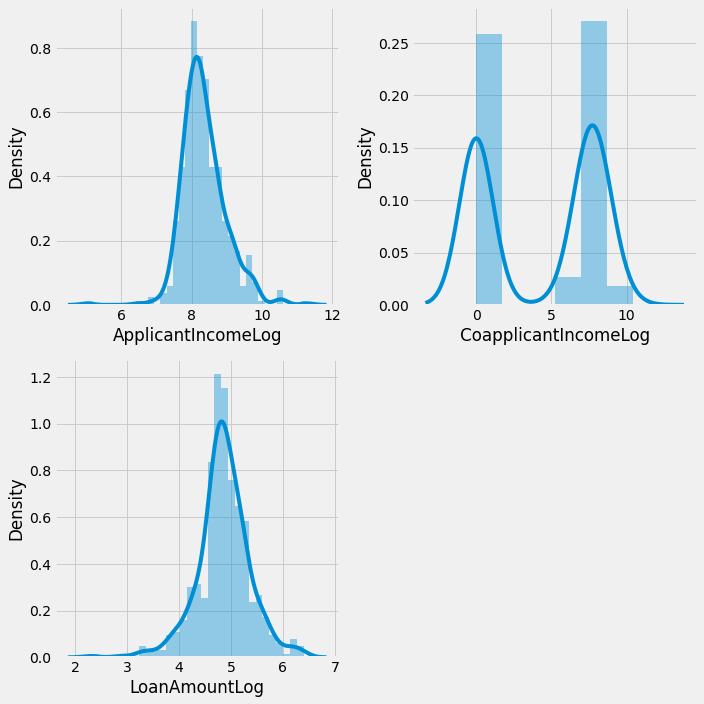

In [11]:
# Applying Log transformation to each numerical_cols
for col in numerical_cols: 
  df[col+'Log'] = np.log(df[col]+1)

# Distplot for Numerical columns after Log Transformation
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.ravel()

for col, ax in zip(numerical_cols, axes): 
  sns.distplot(df[col+'Log'], ax=ax)

fig.delaxes(axes[3])
fig.tight_layout()
plt.show()

#### Correlation Matrix

<AxesSubplot:>

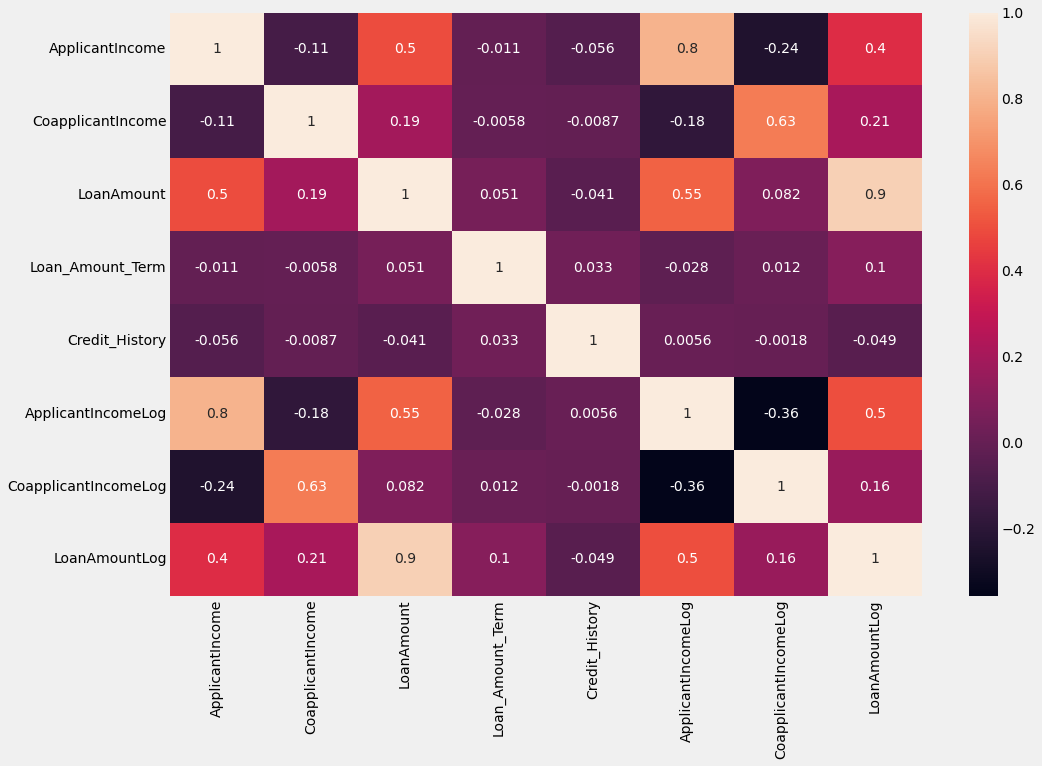

In [12]:
# Correlation Matrix
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)

# Preprocessing

In [13]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.430327,7.319202,4.859812
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,8.006701,0.000000,4.204693


#### Dropping Unnecessary Column's

In [14]:
# Dropping Unnecessary Columns
df = df.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis=1)
df.head(2)


,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,8.430327,7.319202,4.859812
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,8.006701,0.000000,4.204693


### Encoding Columns

In [15]:
# Now Let's Encode Our Categorical Variables

# Label Encoding Features with 2 Unique Variable
cols = ['Gender', 'Loan_Status', 'Education', 'Self_Employed', 'Married']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
  df[col] = le.fit_transform(df[col])


# One-Hot Encoding Features with more than 2 Unique Variable
cols = ['Property_Area', 'Dependents']
df = pd.get_dummies(data=df, columns=cols)

df.head(2)

,Gender,Married,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
1,1,1,0,0,360.0,1.0,0,8.430327,7.319202,4.859812,1,0,0,0,1,0,0
2,1,1,0,1,360.0,1.0,1,8.006701,0.000000,4.204693,0,0,1,1,0,0,0


### Balancing Data

0    148
1    148
Name: Loan_Status, dtype: int64

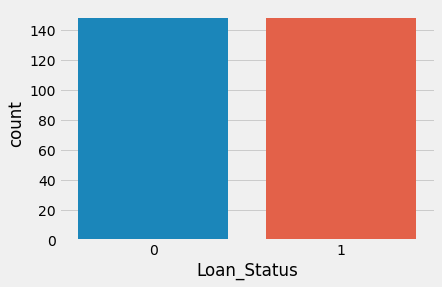

In [16]:
# As Loan_Status is our target varible aur dataset seems to be imbalanced
# Balancing the dataset
max_samples = min(df['Loan_Status'].value_counts())
df_0 = df[df.Loan_Status == 0][:max_samples]
df_1 = df[df.Loan_Status == 1][:max_samples]
df = pd.concat([df_0, df_1])
sns.countplot(df['Loan_Status'])
df['Loan_Status'].value_counts()


### Splitting the Dataset

In [17]:
# Now Let's Split The Dataset into training and testing
from sklearn.model_selection import train_test_split

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scaling Dataset

In [18]:
# Scaling the Dataset
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
X_train_std = SS.fit_transform(X_train)
X_test_std = SS.transform(X_test)

### Feature Importance

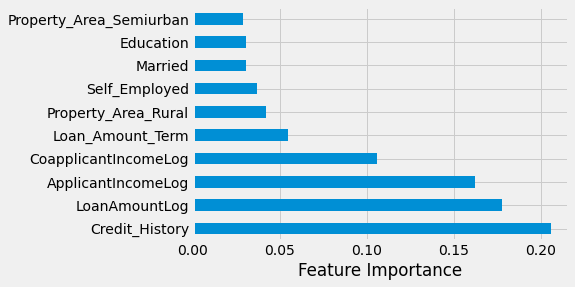

In [19]:
def feature_importance(X, y):
  # Using ExtraTreeClassifier

  from sklearn.ensemble import ExtraTreesClassifier
  import matplotlib.pyplot as plt
  import pandas as pd

  model = ExtraTreesClassifier()
  model.fit(X, y)

  feature_importance = pd.Series(model.feature_importances_, index=X.columns)
  feature_importance.nlargest(10).plot(kind='barh')
  plt.xlabel('Feature Importance')
  plt.show()

feature_importance(X, y)

## Training On Multiple Models

In [20]:
# Our Models to Try
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

models = {
  "Logistic Regression": LogisticRegression(),
  "SVM": SVC(),
  "Linear SVM": LinearSVC(),
  "Nearest Centroid": NearestCentroid(),
  # "Bernoulli NB": BernoulliNB(), # Doesn't Support on Scaled Dataset
  # "Complement NB": ComplementNB(), 
  # "Multinomial NB": MultinomialNB(), 
  "Preceptron": Perceptron(),
  "KNeighbors Classifier": KNeighborsClassifier(),
  "Random Forest Classifier": RandomForestClassifier(),
  "Bagging Classifier": BaggingClassifier(),
  "Decision Tree Classifier": DecisionTreeClassifier(),
  "MLP Classifier": MLPClassifier(),
  }

In [21]:
def Classifier(models, x_train, y_train, x_test, y_test):
  models_names = []
  accuracies = []
  
  for model_name, model in models.items():
    model.fit(x_train, y_train)
    accuracy = np.round(model.score(x_test, y_test), 2)
    models_names.append(model_name)
    accuracies.append(accuracy)

  # Creating DataFrame for models and accuracys
  models_scores = pd.DataFrame(zip(models_names, accuracies), columns=['Model Name', 'Accuracy'])
  
  # Sorting aur table based on accuracies descending
  accuracy_table = models_scores.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)

  return accuracy_table

# print('Accuracy On Unscaled Dataset')
# display(Classifier(models, X_train, y_train, X_test, y_test))

print('Accuracy On Scaled Dataset')
display(Classifier(models, X_train_std, y_train, X_test_std, y_test))

Accuracy On Scaled Dataset


,Model Name,Accuracy
0,Linear SVM,0.79
1,MLP Classifier,0.79
2,Logistic Regression,0.78
3,Nearest Centroid,0.76
4,SVM,0.75
5,Random Forest Classifier,0.75
6,Decision Tree Classifier,0.72
7,Bagging Classifier,0.69
8,Preceptron,0.65
9,KNeighbors Classifier,0.61


## Hyperparameter Tuning Top 2 Model's Performance

### 1. LinearSVC()

In [22]:
# Let's try to improve our model's performance by tuning hyperparameters by finding best hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
# Parameter's That can be optimised in SVM {'C', 'gamma', 'kernel'}
param_grid = {
  'C' : [0.01, 0.1, 1, 10, 100],
  'penalty': ['l1', 'l2'],
  'loss' : ['hinge', 'squared_hinge'],
}
# Using GridSearchCV to find best parameters
model = LinearSVC()
grid = GridSearchCV(model, param_grid, refit=True)
grid.fit(X_train_std, y_train)
print('Best Parameters: ', grid.best_estimator_)
print('Accuracy {:.2f}'.format(grid.score(X_test_std, y_test)))

Best Parameters:  LinearSVC(C=0.1, loss='hinge')
Accuracy 0.76


### 2. LogisticRegression()

In [23]:
from sklearn.model_selection import GridSearchCV
# Parameter's That can be optimised in SVM {'C', 'gamma', 'kernel'}
param_grid = {
  'C' : [0.01, 0.1, 1, 10, 100],
  'penalty': ['l1', 'l2', 'elasticnet', 'none'],
  'fit_intercept' : [True, False],
  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}
# Using GridSearchCV to find best parameters
model = LogisticRegression()
grid = GridSearchCV(model, param_grid, refit=True)
grid.fit(X_train_std, y_train)
print('Best Parameters: ', grid.best_estimator_)
print('Accuracy {:.2f}'.format(grid.score(X_test_std, y_test)))

Best Parameters:  LogisticRegression(C=0.01, fit_intercept=False, solver='newton-cg')
Accuracy 0.78
